<a href="https://colab.research.google.com/github/manojkumarreddy2004/Karkhana.io-Assignment/blob/main/mobius_strip.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mobius Strip Geometry in Python
This notebook models a Möbius strip using parametric equations, computes surface area, edge length, and visualizes it in 3D.

### Parameters:
- **R**: Radius from center to the strip midline
- **w**: Width of the strip
- **n**: Resolution (number of points in the mesh)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Class to represent and compute properties of a Möbius Strip
class MobiusStrip:
    def __init__(self, R=1.0, w=0.2, n=200):
        self.R = R
        self.w = w
        self.n = n

        self.u = np.linspace(0, 2 * np.pi, n)
        self.v = np.linspace(-w / 2, w / 2, n)

        self.U, self.V = np.meshgrid(self.u, self.v)
        self.X, self.Y, self.Z = self._compute_mesh()

    def _compute_mesh(self):
        #Generate the (x, y, z) mesh grid for the Möbius surface using parametric equations.

        U, V, R = self.U, self.V, self.R
        X = (R + V * np.cos(U / 2)) * np.cos(U)
        Y = (R + V * np.cos(U / 2)) * np.sin(U)
        Z = V * np.sin(U / 2)
        return X, Y, Z

    def compute_surface_area(self):
        #Approximate the surface area of the Möbius strip. This uses the magnitude of the cross product of the partial derivatives of the surface, which gives the local area element.
        du = (2 * np.pi) / self.n
        dv = self.w / self.n
        dXdu = np.gradient(self.X, axis=1) / du
        dYdu = np.gradient(self.Y, axis=1) / du
        dZdu = np.gradient(self.Z, axis=1) / du
        dXdv = np.gradient(self.X, axis=0) / dv
        dYdv = np.gradient(self.Y, axis=0) / dv
        dZdv = np.gradient(self.Z, axis=0) / dv

        # Cross product of tangent vectors to get surface normal at each point
        Nx = dYdu * dZdv - dZdu * dYdv
        Ny = dZdu * dXdv - dXdu * dZdv
        Nz = dXdu * dYdv - dYdu * dXdv

        # Magnitude of cross product gives area of each small surface patch
        dA = np.sqrt(Nx**2 + Ny**2 + Nz**2) * du * dv

        # Sum of all patches gives total surface area
        return np.sum(dA)

    def compute_edge_length(self):
        #Approximate the total edge length of the Möbius strip. Only one boundary exists due to the twist. We trace the outer edge at v = w/2.
        u = self.u
        v = self.w / 2

        # Parametric edge curve at v = w/2
        x = (self.R + v * np.cos(u / 2)) * np.cos(u)
        y = (self.R + v * np.cos(u / 2)) * np.sin(u)
        z = v * np.sin(u / 2)

        # Compute distances between consecutive points on the curve
        dx = np.gradient(x)
        dy = np.gradient(y)
        dz = np.gradient(z)

        # Use Euclidean distance to compute total curve length
        return np.sum(np.sqrt(dx**2 + dy**2 + dz**2))

    def plot(self):
        # Display the Möbius strip in a 3D plot using matplotlib.
        fig = plt.figure(figsize=(10, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(self.X, self.Y, self.Z, rstride=5, cstride=5,
                        color='skyblue', edgecolor='k', alpha=0.8)
        ax.set_title("Möbius Strip (3D Visualization)")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.set_zlabel("Z")
        plt.tight_layout()
        plt.show()

## Instantiate and Analyze the Möbius Strip

In [2]:
# Create an instance of the MobiusStrip class
mobius = MobiusStrip(R=1.0, w=0.2, n=300)

# Compute surface area and edge length
area = mobius.compute_surface_area()
edge = mobius.compute_edge_length()

print(f"Surface Area ≈ {area:.4f}")
print(f"Edge Length ≈ {edge:.4f}")

Surface Area ≈ 1.2655
Edge Length ≈ 6.3117


## 3D Visualization

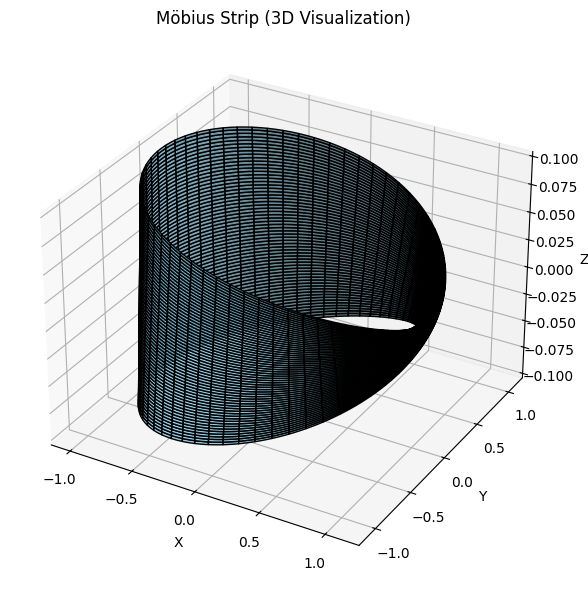

In [3]:
# Show 3D plot of the Möbius strip
mobius.plot()